### Image Classification with CNN

In this noteboke, we will be building image classification model using CNN on MNSIT datasets, in a practical manner, how CNNs work for the image classification task, our exemple is Classify Hand-written Digits 

In [1]:
from keras.datasets import mnist

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
# let's print the shape of the dataset
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Before we train a CNN model, let’s build a basic Fully Connected Neural Network for the dataset. The basic steps to build an image classification model using a neural network are:


1.   Flatten the input image dimensions to 1D (width pixels x height pixels)
2.   Normalize the image pixel values (divide by 255)
3.   One-Hot Encode the categorical column
4.   Build a model architecture (Sequential) with Dense layers
5.   Train the model and make predictions




In [0]:
# 1. Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
# 2. Normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [6]:
# 3. One-hot encoding using keras' numpy-related utilities
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [7]:
y_train[1:5]

array([0, 4, 1, 9], dtype=uint8)

In [8]:
Y_train[1:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
# 4. building a linear stack of layers with the sequential model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [11]:
# looking at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3779 - accuracy: 0.8961 - val_loss: 0.2091 - val_accuracy: 0.9417
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1800 - accuracy: 0.9488 - val_loss: 0.1473 - val_accuracy: 0.9582
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1291 - accuracy: 0.9633 - val_loss: 0.1135 - val_accuracy: 0.9669
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1005 - accuracy: 0.9714 - val_loss: 0.1020 - val_accuracy: 0.9687
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0823 - accuracy: 0.9760 - val_loss: 0.0900 - val_accuracy: 0.9731
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0686 - accuracy: 0.9801 - val_loss: 0.0856 - val_accuracy: 0.9737
Epoch 7/10
60000/60000 [==============================] - 2s 32us/st

In [15]:
y_test[1]

2

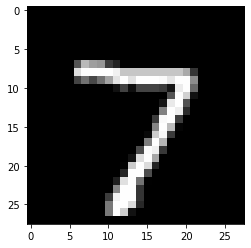

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
image = 255 * X_test[0]
image = image.reshape(28, 28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()


In [33]:
  test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.9753999710083008


In [39]:
import numpy as np
np.argmax(model.predict(X_train[1:2]))

0

In [0]:
from keras.layers import  Softmax
probability_model = Sequential([model, Softmax()])

In [0]:
predictions = probability_model.predict(X_test)


In [37]:
predictions[0]

array([0.08534127, 0.08534124, 0.08534199, 0.08537085, 0.08534124,
       0.08534128, 0.08534124, 0.23189805, 0.08534139, 0.08534142],
      dtype=float32)

In [42]:
np.argmax(predictions[0])

7



---



# Let’s modify the above code to build a CNN model classifier

In [0]:
# reauired imports
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score


loading and preparin the data

In [44]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


building and training our model

In [45]:

model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 48s 796us/step - loss: 0.1994 - accuracy: 0.9410 - val_loss: 0.0695 - val_accuracy: 0.9788
Epoch 2/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.0592 - accuracy: 0.9822 - val_loss: 0.0555 - val_accuracy: 0.9822
Epoch 3/10
60000/60000 [==============================] - 43s 713us/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0453 - val_accuracy: 0.9859
Epoch 4/10
60000/60000 [==============================] - 43s 709us/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0482 - val_accuracy: 0.9845
Epoch 5/10
60000/60000 [==============================] - 42s 706us/step - loss: 0.0131 - accuracy: 0.9965 - val_loss: 0.0552 - val_accuracy: 0.9834
Epoch 6/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0491 - val_accuracy: 0.9854
Epoch 7/10
60000/60000 [==============================] 

In [0]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

In [49]:
print('loss :',test_loss, ' __ acc :',test_acc)

loss : 0.07319641761352631  __ acc : 0.9811000227928162
